## Importing All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import time
import warnings
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset i.e. Nabil Bank (nabil) Stock Price Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MSc. Dissertation/Dataset/nabil.csv')

In [3]:
df.head()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,3/20/2011,"1,200.00","1,190.00","1,160.00","1,170.00",0.0,853,"1,000,811.00"
1,3/24/2011,"1,162.00","1,178.00","1,150.00","1,153.00",0.0,356,"412,649.00"
2,3/25/2011,"1,153.00","1,174.00","1,145.00","1,174.00",0.0,702,"807,507.00"
3,3/27/2011,"1,174.00","1,160.00","1,120.00","1,147.00",0.0,"1,426.00","1,619,270.00"
4,3/28/2011,"1,147.00","1,150.00","1,110.00","1,132.00",0.0,352,"393,534.00"


In [4]:
df.tail()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
3078,9/18/2024,562,565,550,556,-0.93,"68,886.00","38,431,118.40"
3079,9/22/2024,556,578,556,562,1.08,"55,026.00","31,054,968.70"
3080,9/23/2024,573.2,573.2,555,568,1.07,"123,568.00","69,577,465.00"
3081,9/24/2024,567,567,552.1,553.5,-2.55,"66,337.00","36,962,336.00"
3082,9/25/2024,550,560,545.1,555,0.27,"50,441.00","27,867,328.70"


In [5]:
df.duplicated().sum()

1

## Copying the dataset for future use

In [6]:
df1 = df.copy()
df1.reset_index(inplace=True)

In [7]:
df.reset_index(drop=True, inplace=True)

### Renaming and Dropping unwanted column

In [8]:
df.drop(['% Change', 'Turnover'], axis=1, inplace=True)
df = df.rename(columns = {
    'Ltp': 'Close',
    'Qty': 'Volume'
})

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Volume'] = df['Volume'].str.replace(',', '').astype(float).astype(int)

### Splitting into features and target

In [10]:
X = df.drop(['Close', 'Date'], axis=1)
y = df['Close']

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Splitting the data into train and test set

In [12]:
# X_train, X_test, y_train, y_test = X[:round(X.shape[0]*0.8)], X[round(X.shape[0]*0.8):], y[:round(y.shape[0]*0.8)], y[round(y.shape[0]*0.8):]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Building using Random Forest Regression



In [13]:
model = XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.05, random_state=42)
start = time.time()
model.fit(X_train, y_train)
end = time.time()
print('Time taken to train the model:', end-start)

Time taken to train the model: 1.234581470489502


In [14]:
model.score(X_train, y_train)

0.9998160820011465

In [15]:
predicted = model.predict(X_test)
predicted

array([1156.1509 , 1597.79   ,  685.2113 , 1754.6827 , 1069.5038 ,
       2301.468  , 1146.3308 ,  925.2201 ,  585.163  , 1618.7911 ,
        835.73834, 1987.2725 , 1881.6609 , 1509.3752 , 1536.6061 ,
       1689.5692 ,  726.8946 , 1943.3875 ,  762.30914,  881.22266,
        944.5759 , 1601.1405 , 1895.3104 ,  438.12195,  829.54486,
        894.15894, 2397.6555 , 2526.1606 ,  925.70337,  989.5855 ,
       1451.5455 ,  595.54095, 2368.342  , 1288.328  , 1287.9232 ,
       1468.2327 , 1242.2142 , 1066.6593 ,  664.92596, 1420.0658 ,
        944.6528 ,  610.9746 , 1465.8435 ,  572.408  , 1335.4692 ,
        919.1268 , 2403.7754 ,  999.35065, 1489.1716 , 1975.4603 ,
       1729.4297 ,  464.12302,  793.3345 ,  871.4003 , 1884.0991 ,
       2455.2153 , 1143.9047 ,  683.0571 ,  983.773  , 1319.0496 ,
       1513.0637 , 1311.1173 ,  926.9467 ,  865.55457,  875.94635,
       1107.9288 , 2147.2139 ,  842.2276 , 2333.345  , 1478.465  ,
        810.21014,  594.9874 ,  764.89124,  802.2631 ,  832.44

In [16]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
for a in prediction.index:
    for b in df.index:
        if a == b:
            prediction['Date'] = df['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2011-03-20,1170.0,1183.671509
2011-04-13,1218.0,1137.352173
2011-04-28,1046.0,1054.712036
2011-05-04,1019.0,1030.176758
2011-05-10,1050.0,1047.640869
...,...,...
2024-07-31,649.3,647.424316
2024-08-07,631.5,620.167664
2024-09-04,595.0,614.070923


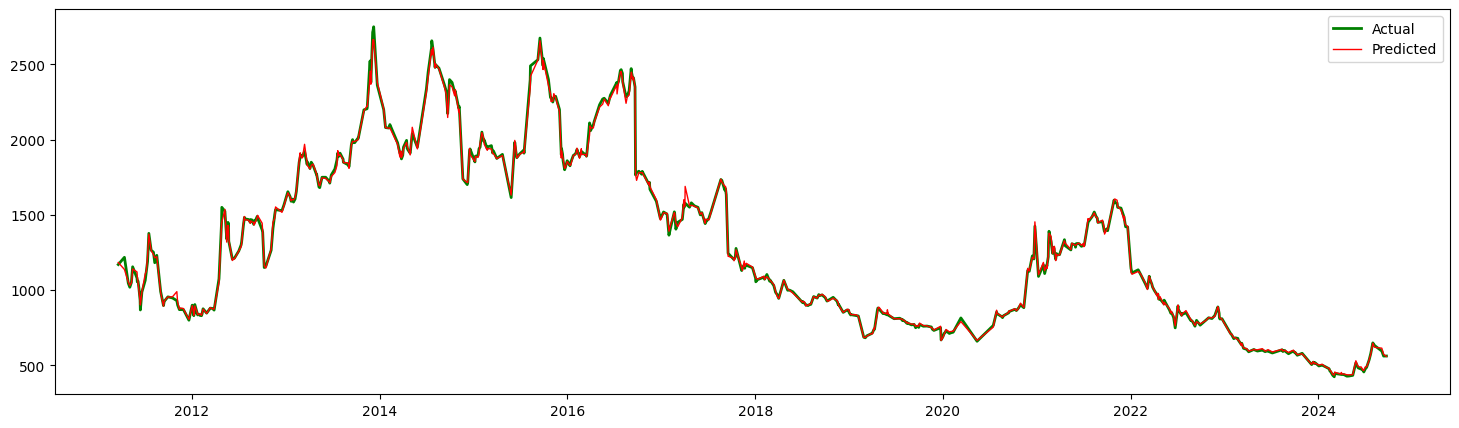

In [17]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=2)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()

## Calculating the Performance Evaluation Metrics

In [18]:
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 305.16785283918654
Root Mean Squared Error: 17.46905414838441
Mean Absolute Error: 10.90987634890663


### Here the performance metrics are too much higher so, we have to tune the hyperparameters.

In [19]:
model_params = {
    'n_estimators': [1, 5, 10, 100, 200, 300, 400],
    'max_depth': [10, 20, 30, None]
    }

grid_search = GridSearchCV(XGBRegressor(random_state=42), model_params, cv=5, return_train_score=False)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'max_depth': [10, 20, 30, None],
                         'n_estimators': [1, 5, 10, 100, 200, 300, 400]})

In [20]:
grid_search.best_params_

{'max_depth': None, 'n_estimators': 100}

In [21]:
grid_search.best_score_

0.9991246543105259

In [22]:
grid_search_prediction = grid_search.predict(X_test)
grid_search_prediction

array([1150.3624 , 1602.7671 ,  678.38086, 1757.15   , 1069.9097 ,
       2297.9448 , 1148.3378 ,  922.2025 ,  580.41705, 1617.9363 ,
        831.9215 , 1984.1177 , 1889.7297 , 1505.9799 , 1519.1884 ,
       1694.5914 ,  721.08124, 1946.5288 ,  755.7733 ,  881.4848 ,
        938.84283, 1605.1842 , 1893.8567 ,  430.44916,  828.8945 ,
        892.49945, 2399.2356 , 2568.0845 ,  925.0764 ,  979.7597 ,
       1453.9478 ,  592.01556, 2372.9478 , 1296.822  , 1282.6567 ,
       1473.0151 , 1235.7108 , 1065.0066 ,  673.8074 , 1403.0508 ,
        943.0428 ,  610.12085, 1463.7949 ,  569.3166 , 1333.73   ,
        919.5204 , 2380.0715 , 1000.8058 , 1481.8134 , 1977.8647 ,
       1733.4083 ,  459.0995 ,  794.29224,  868.64355, 1879.0884 ,
       2437.8445 , 1154.0227 ,  681.39557,  985.3719 , 1298.6576 ,
       1511.466  , 1309.9243 ,  915.2409 ,  866.9098 ,  873.6672 ,
       1091.5321 , 2143.7712 ,  840.3791 , 2345.7139 , 1480.8251 ,
        808.43195,  591.1621 ,  757.1832 ,  800.60126,  822.79

In [23]:
prediction = pd.DataFrame({'Actual': y_test, 'Predicted': grid_search_prediction})
for a in prediction.index:
    for b in df.index:
        if a == b:
            prediction['Date'] = df['Date']
prediction.set_index('Date', inplace=True)
prediction.sort_index(inplace=True)
prediction

,Actual,Predicted
Date,,
2011-03-20,1170.0,1176.446045
2011-04-13,1218.0,1131.664795
2011-04-28,1046.0,1053.611938
2011-05-04,1019.0,1023.652710
2011-05-10,1050.0,1051.047852
...,...,...
2024-07-31,649.3,639.709290
2024-08-07,631.5,611.527405
2024-09-04,595.0,611.972351


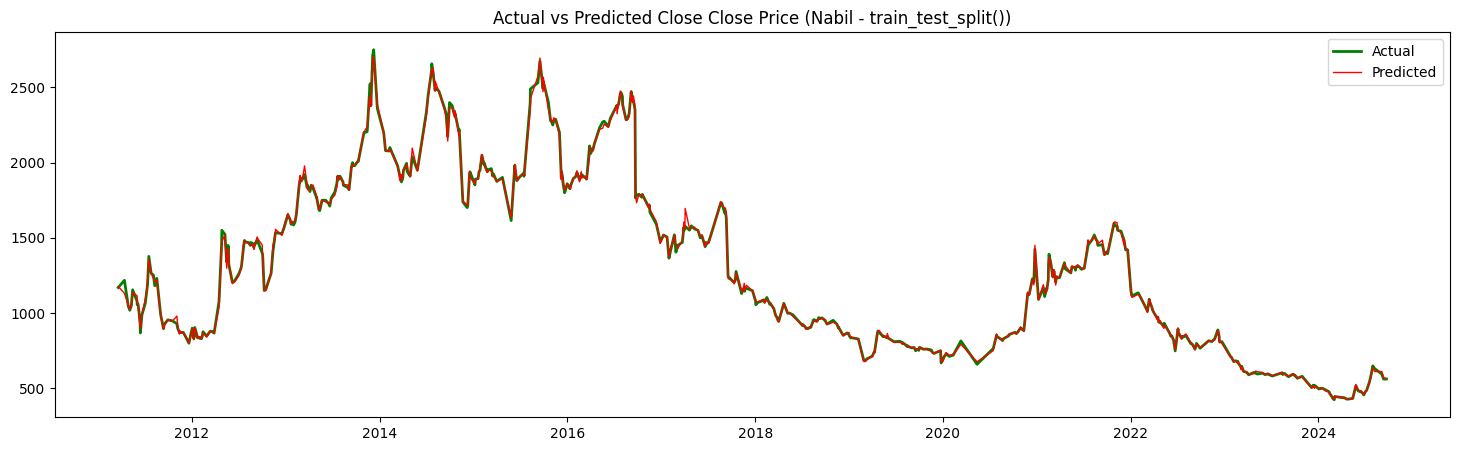

In [24]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=2)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.title('Actual vs Predicted Close Close Price (Nabil - train_test_split())')
plt.legend()
plt.show()

### Performance Evaluation Metrics after Hyperparameter Tuning

In [25]:
mse = mean_squared_error(y_test, grid_search_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, grid_search_prediction)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 282.95487848293584
Root Mean Squared Error: 16.821262689909336
Mean Absolute Error: 10.66830145590116
